In [1]:
import pandas as pd
import numpy as np

c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
c:\Users\e.a.wright\anaconda3\envs\datascience\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
file_path = 'data/NSDUH_2021_Tab.txt'

data = pd.read_csv(file_path, sep='\t')

C:\Users\e.a.wright\AppData\Local\Temp\ipykernel_7492\2103078997.py:3: DtypeWarning: Columns (2792) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, sep='\t')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58034 entries, 0 to 58033
Columns: 2988 entries, QUESTID2 to VEREP
dtypes: float64(539), int64(2447), object(2)
memory usage: 1.3+ GB


In [4]:
# Combine the starter MJ codes and the select MJ Market codes
MJ_CODES = [
"MJEVER", # Ever used marijuana/hashish
"MJAGE", # Age when first used marijuana/hashish
"MJYFU", # Year of first use marijuana/hashish use
"MJREC", # Month of first use marijuana/hashish use 
"MJYRTOT", # Total number of days used marijuana/hashish in past 12 months
"MRTOTFG", # Trimming indicator for MJRTOT
"MJFQFLG", # Trimmed MJRTOT if R is used < 12
"MRBSTWAY", # EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH 
"MRDAYPYR", # DAYS USED MARIJUANA/HASHISH PAST 12 MONTHS
"MRDAYPMO", # DAYS PER MO USED MARIJUANA/HASHISH PAST 12 MOS
"MRDAYPWK", # DAYS PER WEEK USED MARIJUANA/HASHISH PAST 12 MOS
"MJDAY30A", # DAYS USED MARIJUANA/HASHISH PAST 30 DAYS
"MR30EST", # BEST EST. # DAYS USED MARIJUANA PAST 30 DAYS
'MMBTPYR', # Bought MJ in past 12 months
'MMBT30DY', # # Days bought MH in Past Month
'MMBTDISP', # Bought from store or dispoensary
'MMBJOINT', # Last MJ bought in joints
'MMBLOOSE', # Last MJ bought in Loose form
'MMBOTHER', # Last MJ bought in other form
'MMLSUNIT1', # AMT MJ bought in last time: grams/oz/lbs
'MMLSPCTB1', # Amount paid for MJ last time in bins
'MMLSPCAT1', # Price category of last loose marijuana bought
'MMBSELL', # Sell any marijuana bought last time
]

In [5]:
# Subset the dataset down to only MJ Codes (Mental Health Outcome)
TARGETS = [
'IRIMPREMEM', # DIFFICULTY REMEMBERING ONE MO IN PST 12 MOS - IMP REV (457) --> BINARY!
'ADDPREV', # SEVERAL DAYS OR LNGR WHEN FELT SAD/EMPTY/DPRSD (506) --> BINARY!
'IRSUIPLANYR', # ADULT MADE PLANS TO KILL SELF IN PST YR - IMP REV (499)
'ASDSREL2', # ADULT: DEP FEELINGS ROLE IMPAIRMENT - CLOSE RELATIONSHIPS (520)
'IRAMDEYR', # ADULT: PAST YEAR MAJOR DEPRESSIVE EPISODE (MDE) - IMP REV
'IRDSTCHR12' # HOW OFTEN FELT COULDN'T BE CHEERED UP WRST MONTH - IMP REV
]

In [6]:
# Manually combine lists before subsetting dataset
COLUMNS = [
# Features
"MJEVER", # Ever used marijuana/hashish
"MJAGE", # Age when first used marijuana/hashish
"MJYFU", # Year of first use marijuana/hashish use
"MJREC", # Month of first use marijuana/hashish use 
"MJYRTOT", # Total number of days used marijuana/hashish in past 12 months
"MRTOTFG", # Trimming indicator for MJRTOT
"MJFQFLG", # Trimmed MJRTOT if R is used < 12
"MRBSTWAY", # EASIEST WAY TO TELL US # DAYS USED MARIJUANA/HASH 
"MRDAYPYR", # DAYS USED MARIJUANA/HASHISH PAST 12 MONTHS
"MRDAYPMO", # DAYS PER MO USED MARIJUANA/HASHISH PAST 12 MOS
"MRDAYPWK", # DAYS PER WEEK USED MARIJUANA/HASHISH PAST 12 MOS
"MJDAY30A", # DAYS USED MARIJUANA/HASHISH PAST 30 DAYS
"MR30EST", # BEST EST. # DAYS USED MARIJUANA PAST 30 DAYS
'MMBTPYR', # Bought MJ in past 12 months
'MMBT30DY', # # Days bought MH in Past Month
'MMBTDISP', # Bought from store or dispoensary
'MMBJOINT', # Last MJ bought in joints
'MMBLOOSE', # Last MJ bought in Loose form
'MMBOTHER', # Last MJ bought in other form
'MMLSUNIT1', # AMT MJ bought in last time: grams/oz/lbs
'MMLSPCTB1', # Amount paid for MJ last time in bins
'MMLSPCAT1', # Price category of last loose marijuana bought
'MMBSELL', # Sell any marijuana bought last time
# Targets
'IRIMPREMEM', # DIFFICULTY REMEMBERING ONE MO IN PST 12 MOS - IMP REV (457) --> BINARY!
'ADDPREV', # SEVERAL DAYS OR LNGR WHEN FELT SAD/EMPTY/DPRSD (506) --> BINARY!
'IRSUIPLANYR', # ADULT MADE PLANS TO KILL SELF IN PST YR - IMP REV (499)
'ASDSREL2', # ADULT: DEP FEELINGS ROLE IMPAIRMENT - CLOSE RELATIONSHIPS (520)
'IRAMDEYR', # ADULT: PAST YEAR MAJOR DEPRESSIVE EPISODE (MDE) - IMP REV
'IRDSTCHR12' # HOW OFTEN FELT COULDN'T BE CHEERED UP WRST MONTH - IMP REV
]

In [7]:
df = data[COLUMNS]

In [8]:
df.head()

,MJEVER,MJAGE,MJYFU,MJREC,MJYRTOT,MRTOTFG,MJFQFLG,MRBSTWAY,MRDAYPYR,MRDAYPMO,...,MMLSUNIT1,MMLSPCTB1,MMLSPCAT1,MMBSELL,IRIMPREMEM,ADDPREV,IRSUIPLANYR,ASDSREL2,IRAMDEYR,IRDSTCHR12
0,1,19,9999,1,52,98,98,1,999,99,...,1,7,70,2,2,2,0.0,NaN,0.0,99
1,2,991,9991,91,991,98,98,91,991,91,...,91,91,991,91,99,2,0.0,NaN,0.0,99
2,2,991,9991,91,991,98,98,91,991,91,...,91,91,991,91,1,2,0.0,NaN,0.0,4
3,1,13,9999,1,364,98,98,1,999,99,...,99,99,999,99,2,1,0.0,NaN,0.0,99
4,2,991,9991,91,991,98,98,91,991,91,...,91,91,991,91,99,2,0.0,NaN,0.0,99


In [9]:
# Drop all rows where MJEVER is not 1 or 2
df = df[df['MJEVER'].isin([1,2])]

# Check that we have only 1 and 2 in MJEVER
df['MJEVER'].value_counts()

2    32487
1    25355
Name: MJEVER, dtype: int64

In [10]:
# Change the 2s in MJEVER to 0s
df.loc[df['MJEVER'] == 2, 'MJEVER'] = 0

# Inspect changes
df['MJEVER'].value_counts()

0    32487
1    25355
Name: MJEVER, dtype: int64

<Axes: ylabel='Frequency'>

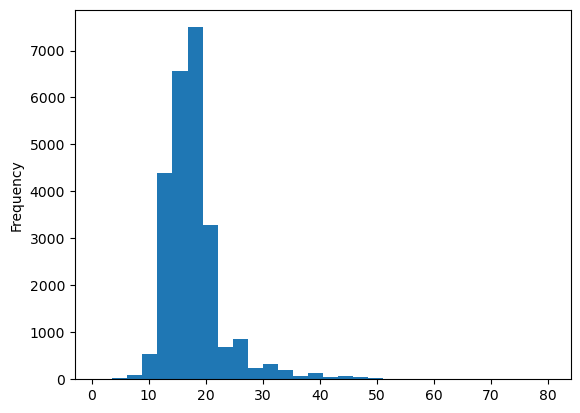

In [11]:
# Further inspect MJAGE to see how we can handle that field

# Get all MJAGE values less than 82
actual_ages = df[df['MJAGE'] < 82]['MJAGE']

actual_ages.plot.hist(bins=30)

In [12]:
# Create a binary variable for 5 year age groups (using MJAGE) up until 30 years old, and then a 31+ category

# <= 5
df['AGE_5'] = np.where(df['MJAGE'] <= 5, 1, 0)
# 6-10
df['AGE_6_10'] = np.where((df['MJAGE'] > 5) & (df['MJAGE'] <= 10), 1, 0)
# 11-15
df['AGE_11_15'] = np.where((df['MJAGE'] > 10) & (df['MJAGE'] <= 15), 1, 0)
# 16-20
df['AGE_16_20'] = np.where((df['MJAGE'] > 15) & (df['MJAGE'] <= 20), 1, 0)
# 21-25
df['AGE_21_25'] = np.where((df['MJAGE'] > 20) & (df['MJAGE'] <= 25), 1, 0)
# 26-30
df['AGE_26_30'] = np.where((df['MJAGE'] > 25) & (df['MJAGE'] <= 30), 1, 0)
# 31+
df['AGE_31'] = np.where(df['MJAGE'] > 30, 1, 0)

In [13]:
# Use MJREC to create 3 new binary variables: MJUSE30, MJUSENOT30BUT12, MJUSEMORE12

# Where MJREC == 1, MJUSE30 = 1, else 0
df['MJUSE30'] = np.where(df['MJREC'] == 1, 1, 0)

# Where MJREC == 2, MJUSENOT30BUT12 = 1, else 0
df['MJUSENOT30BUT12'] = np.where(df['MJREC'] == 2, 1, 0)

# Where MJREC == 3, MJUSEMORE12 = 1, else 0
df['MJUSEMORE12'] = np.where(df['MJREC'] == 3, 1, 0)

# Inspect the new variables by printing value counts
print(df['MJUSE30'].value_counts())
print(df['MJUSENOT30BUT12'].value_counts())
print(df['MJUSEMORE12'].value_counts())

0    49666
1     8176
Name: MJUSE30, dtype: int64
0    54002
1     3840
Name: MJUSENOT30BUT12, dtype: int64
0    44956
1    12886
Name: MJUSEMORE12, dtype: int64


<Axes: >

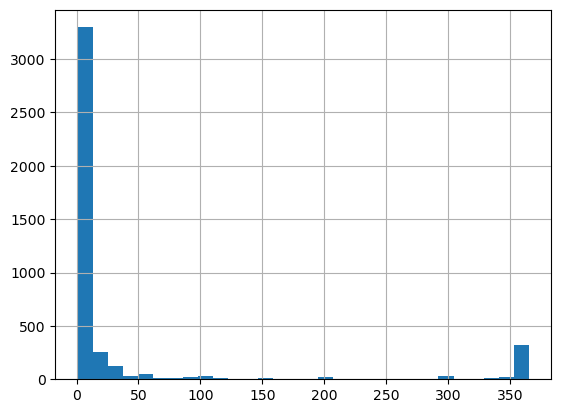

In [14]:
# Filter MRDAYPYR to values less than 366
mj_use_last_year = df[df['MRDAYPYR'] < 366]

# Plot histogram of MJ use in last year
mj_use_last_year['MRDAYPYR'].hist(bins=30)

In [15]:
# Create a new binary variable called MJUSE100DAYS+ for all individuals who used MJ for 100 days or more in the past year
df['MJUSE100DAYS+'] = np.where(df['MRDAYPYR'] >= 100, 1, 0)

# Inspect value_counts() of MJUSE100DAYS+
df['MJUSE100DAYS+'].value_counts()

1    54055
0     3787
Name: MJUSE100DAYS+, dtype: int64

In [16]:
second_pass_df = df[['MJEVER', 'AGE_5', 'AGE_6_10', 'AGE_11_15', 'AGE_16_20', 'AGE_21_25',
       'AGE_26_30', 'AGE_31', 'MJUSE30', 'MJUSENOT30BUT12', 'MJUSEMORE12', 'MJUSE100DAYS+', 'ADDPREV']]

In [17]:
second_pass_df

,MJEVER,AGE_5,AGE_6_10,AGE_11_15,AGE_16_20,AGE_21_25,AGE_26_30,AGE_31,MJUSE30,MJUSENOT30BUT12,MJUSEMORE12,MJUSE100DAYS+,ADDPREV
0,1,0,0,0,1,0,0,0,1,0,0,1,2
1,0,0,0,0,0,0,0,1,0,0,0,1,2
2,0,0,0,0,0,0,0,1,0,0,0,1,2
3,1,0,0,1,0,0,0,0,1,0,0,1,1
4,0,0,0,0,0,0,0,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58029,1,0,0,0,0,1,0,0,0,0,1,1,2
58030,1,0,0,0,0,1,0,0,0,0,1,1,1
58031,1,0,0,0,1,0,0,0,1,0,0,1,2
58032,1,0,0,0,1,0,0,0,0,1,0,0,1


In [18]:
# Freq Pct
# 1 = Yes................................................................................................................................ 16069 27.69
# 2 = No................................................................................................................................. 29524 50.87
# 85 = BAD DATA Logically assigned ................................................................................. 7 0.01
# 94 = DON'T KNOW........................................................................................................... 59 0.10
# 97 = REFUSED .................................................................................................................. 108 0.19
# 98 = BLANK (NO ANSWER) ........................................................................................... 1524 2.63
# 99 = LEGITIMATE SKIP................................................................................................... 10743 18.51

In [19]:
# Import ignore warnings
import warnings
# q: How do I ignore warnings?
warnings.filterwarnings('ignore')

# Process ADDPREV, keeping 1 as 1, changing 2 to 0, changing 99 to 2, and setting 85, 94, 97, and 98 to NaN
second_pass_df['ADDPREV'] = second_pass_df['ADDPREV'].replace(2, 0)
second_pass_df['ADDPREV'] = second_pass_df['ADDPREV'].replace(99, np.nan) # Legitimate Skip - Ask Will how to handle this. Setting to NaN for now.
second_pass_df['ADDPREV'] = second_pass_df['ADDPREV'].replace(85, np.nan)
second_pass_df['ADDPREV'] = second_pass_df['ADDPREV'].replace(94, np.nan)
second_pass_df['ADDPREV'] = second_pass_df['ADDPREV'].replace(97, np.nan)
second_pass_df['ADDPREV'] = second_pass_df['ADDPREV'].replace(98, np.nan)

In [20]:
# Inspect
second_pass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57842 entries, 0 to 58033
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MJEVER           57842 non-null  int64  
 1   AGE_5            57842 non-null  int32  
 2   AGE_6_10         57842 non-null  int32  
 3   AGE_11_15        57842 non-null  int32  
 4   AGE_16_20        57842 non-null  int32  
 5   AGE_21_25        57842 non-null  int32  
 6   AGE_26_30        57842 non-null  int32  
 7   AGE_31           57842 non-null  int32  
 8   MJUSE30          57842 non-null  int32  
 9   MJUSENOT30BUT12  57842 non-null  int32  
 10  MJUSEMORE12      57842 non-null  int32  
 11  MJUSE100DAYS+    57842 non-null  int32  
 12  ADDPREV          45489 non-null  float64
dtypes: float64(1), int32(11), int64(1)
memory usage: 3.8 MB


In [21]:
# Drop all rows with NaN values
second_pass_df = second_pass_df.dropna()

# Reinspect info
second_pass_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45489 entries, 0 to 58033
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MJEVER           45489 non-null  int64  
 1   AGE_5            45489 non-null  int32  
 2   AGE_6_10         45489 non-null  int32  
 3   AGE_11_15        45489 non-null  int32  
 4   AGE_16_20        45489 non-null  int32  
 5   AGE_21_25        45489 non-null  int32  
 6   AGE_26_30        45489 non-null  int32  
 7   AGE_31           45489 non-null  int32  
 8   MJUSE30          45489 non-null  int32  
 9   MJUSENOT30BUT12  45489 non-null  int32  
 10  MJUSEMORE12      45489 non-null  int32  
 11  MJUSE100DAYS+    45489 non-null  int32  
 12  ADDPREV          45489 non-null  float64
dtypes: float64(1), int32(11), int64(1)
memory usage: 2.9 MB


In [22]:
# Convert ADDPREV to integer
second_pass_df['ADDPREV'] = second_pass_df['ADDPREV'].astype(int)

In [23]:
# Check
second_pass_df['ADDPREV'].dtype

dtype('int32')

In [24]:
# Define X and y
X = second_pass_df.drop(columns=['ADDPREV'])
y = second_pass_df['ADDPREV']

In [25]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [26]:
# Let's first use a Random Forest Classifier to predict the labels of the test set.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = rf.predict(X_test)

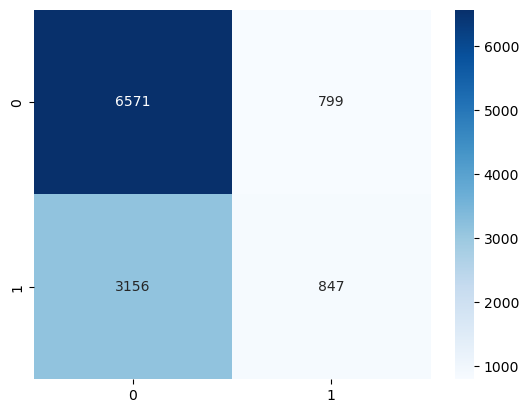

In [27]:
# Now generate a more visually appealing confusion matrix using seaborn

import seaborn as sns
import matplotlib.pyplot as plt

ax1 = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.show(ax1)

## In this iteration of the model, there were:
### 1. 6642 TNs
### 2. 3234 FNs
### 3. 728 FPs
### 4. 769 TPs

In [28]:
# Print a classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.89      0.77      7370
           1       0.51      0.21      0.30      4003

    accuracy                           0.65     11373
   macro avg       0.60      0.55      0.53     11373
weighted avg       0.62      0.65      0.60     11373



In [29]:
# Compute and print metrics
print("Accuracy: {}".format(rf.score(X_test, y_test)))

Accuracy: 0.6522465488437528


In [30]:
# The model is not yet good at predicting postives.

# q: How can we improve a RandomForestClassifier without adding more data?
# a: We can tune the hyperparameters of the model.

In [31]:
# Create feature importance dataframe to analyze the importance of each feature
fi_values = rf.feature_importances_
features = X_train.columns

# Create dataframe
feature_importance_df = pd.DataFrame({"feature": features, "feature_importance": fi_values})

# Sort in descending order
feature_importance_df = feature_importance_df.sort_values(by="feature_importance", ascending = False)

# View dataframe
feature_importance_df

,feature,feature_importance
0,MJEVER,0.342399
7,AGE_31,0.250781
8,MJUSE30,0.111104
3,AGE_11_15,0.077500
10,MJUSEMORE12,0.076292
4,AGE_16_20,0.045040
11,MJUSE100DAYS+,0.043610
9,MJUSENOT30BUT12,0.032500
6,AGE_26_30,0.007350
5,AGE_21_25,0.005729


In [32]:
# Tune Hyperparameters of the model above

# First print the parameters currently in use
print('Parameters currently in use:\n')
rf.get_params()

Parameters currently in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
# Double the number of estimators and test again

rf.bootstrap = True
rf.n_estimator = 100
rf.max_depth = 100
rf.min_samples_leaf = 1
rf.min_samples_split = 5
rf.criterion = 'entropy'

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77      7370
           1       0.52      0.18      0.27      4003

    accuracy                           0.65     11373
   macro avg       0.60      0.55      0.52     11373
weighted avg       0.62      0.65      0.60     11373



### Third Pass: First attempt at MultiOutputClassifier

In [34]:
multi_output_df = df[['MJEVER', 'AGE_5', 'AGE_6_10', 'AGE_11_15', 'AGE_16_20', 'AGE_21_25',
       'AGE_26_30', 'AGE_31', 'MJUSE30', 'MJUSENOT30BUT12', 'MJUSEMORE12', 'MJUSE100DAYS+', 'ADDPREV',
       'IRIMPREMEM', 'IRSUIPLANYR', 'ASDSREL2', 'IRAMDEYR', 'IRDSTCHR12']]

In [35]:
# Use MultiOutputClassifier with Random Forest Classifier to predict all 6 targets

# We already have the features and targets in df. So reinspect df:
df.head()

,MJEVER,MJAGE,MJYFU,MJREC,MJYRTOT,MRTOTFG,MJFQFLG,MRBSTWAY,MRDAYPYR,MRDAYPMO,...,AGE_6_10,AGE_11_15,AGE_16_20,AGE_21_25,AGE_26_30,AGE_31,MJUSE30,MJUSENOT30BUT12,MJUSEMORE12,MJUSE100DAYS+
0,1,19,9999,1,52,98,98,1,999,99,...,0,0,1,0,0,0,1,0,0,1
1,0,991,9991,91,991,98,98,91,991,91,...,0,0,0,0,0,1,0,0,0,1
2,0,991,9991,91,991,98,98,91,991,91,...,0,0,0,0,0,1,0,0,0,1
3,1,13,9999,1,364,98,98,1,999,99,...,0,1,0,0,0,0,1,0,0,1
4,0,991,9991,91,991,98,98,91,991,91,...,0,0,0,0,0,1,0,0,0,1


In [36]:
# Need more features!

# Cigarettes - CIGEVER
# Marijuana - MJEVER
# Alcohol - ALCEVER
# Cocaine - COCEVER
# Crack - CRKEVER
# Heroin - HEREVER
# Hallucinogen - LSD
# Methamphetamine - METHAMEVR

In [ ]:
drug_list = ["CIGEVER", "MJEVER", "ALCEVER", "COCEVER", "CRKEVER", "HEREVER", "LSD", "METHAMEVR"]

In [ ]:
drugs_df = data[""]

In [ ]:
# Cocaine
